In [7]:
import pandas as pd
import numpy as np
from sklearn.datasets import  make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
X,y = make_blobs(n_samples=150,n_features=2,centers=3,cluster_std=0.5,shuffle=True,random_state=0)

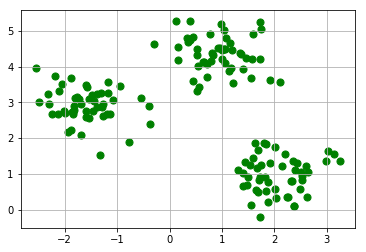

In [6]:
plt.scatter(X[:,0],X[:,1],c='green',marker='o',s=50)
plt.grid()
plt.show()

In [8]:
km = KMeans(n_clusters=3,init='random',n_init=10,max_iter=300,tol=1e-04,random_state=0)
y_km = km.fit_predict(X)

上述代码中，设定簇数量为3；指定先验的簇数量是k-means算法的一个缺陷，设置n_init=10,程序能够基于不同的随机初始化中心点独立运行算法10次，并从中选择SSE最小的作为最终模型。

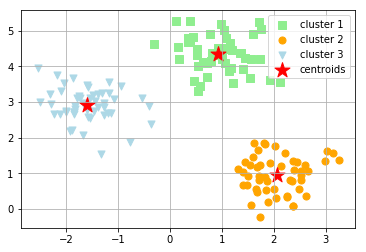

In [10]:
plt.scatter(X[y_km==0,0],X[y_km==0,1],s=50,c='lightgreen',marker='s',label='cluster 1')
plt.scatter(X[y_km==1,0],X[y_km==1,1],s=50,c='orange',marker='o',label='cluster 2')
plt.scatter(X[y_km==2,0],X[y_km==2,1],s=50,c='lightblue',marker='v',label='cluster 3')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=250,marker='*',c='red',label='centroids')
plt.legend()
plt.grid()
plt.show()